In [148]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# I. Data Understanding

In [149]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


## 1. Xét các dòng và các cột

In [150]:
n_rows , n_cols = hotel_df.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột')

Dữ liệu có 119390 dòng và 32 cột


## 2. Ý nghĩa của từng cột và hàng

In [151]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

+ Mỗi hàng là thông tin của 1 khách hàng đặt phòng khách 

+ Ý nghĩa của từng cột trong dữ liệu được tóm tắt trong bảng sau:

| **TÊN CỘT**                         | **MÔ TẢ**                                       | **KIỂU DỮ LIỆU**   |
|:---------------------------------|:---------------------------------------------|:----------------|
| **`hotel`**                           | Loại khách sạn                              | Chuỗi (String)|
| **`is_canceled`**                     | Đánh dấu liệu đặt phòng đã bị hủy          | Số nguyên (Integer)|
| **`lead_time`**                       | Thời gian từ đặt phòng đến nhận phòng      | Số nguyên (Integer)|
| **`arrival_date_year`**               | Năm của ngày nhận phòng                     | Số nguyên (Integer)|
| **`arrival_date_month`**              | Tháng của ngày nhận phòng                   | Chuỗi (String)|
| **`arrival_date_week_number`**        | Tuần trong năm của ngày nhận phòng          | Số nguyên (Integer)|
| **`arrival_date_day_of_month`**       | Ngày trong tháng của ngày nhận phòng        | Số nguyên (Integer)|
| **`stays_in_weekend_nights`**         | Số đêm nghỉ cuối tuần                       | Số nguyên (Integer)|
| **`stays_in_week_nights`**            | Số đêm nghỉ trong tuần                     | Số nguyên (Integer)|
| **`adults`**                          | Số người lớn                                | Số nguyên (Integer)|
| **`children`**                        | Số trẻ em                                   | Số nguyên (Integer)|
| **`babies`**                          | Số em bé                                    | Số nguyên (Integer)|
| **`meal`**                            | Loại bữa ăn đặt phòng                      | Chuỗi (String)|
| **`country`**                         | Quốc gia của khách hàng                     | Chuỗi (String)|
| **`market_segment`**                  | Phân khúc thị trường                        | Chuỗi (String)|
| **`distribution_channel`**            | Kênh phân phối                              | Chuỗi (String)|
| **`is_repeated_guest`**               | Đánh dấu liệu khách hàng là khách quen trở lại | Số nguyên (Integer)|
| **`previous_cancellations`**          | Số lần hủy đặt phòng trước đó của khách hàng | Số nguyên (Integer)|
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó không bị hủy của khách hàng | Số nguyên (Integer)|
| **`reserved_room_type`**              | Loại phòng được đặt trước                   | Chuỗi (String)|
| **`assigned_room_type`**              | Loại phòng được chỉ định cho khách hàng     | Chuỗi (String)|
| **`booking_changes`**                 | Số lần thay đổi đặt phòng                  | Số nguyên (Integer)|
| **`deposit_type`**                    | Loại tiền đặt cọc đã được thanh toán       | Chuỗi (String)|
| **`agent`**                           | Mã đại lý đặt phòng                         | Số nguyên (Integer)|
| **`company`**                         | Mã công ty đặt phòng                        | Số nguyên (Integer)|
| **`days_in_waiting_list`**            | Số ngày trong danh sách chờ                | Số nguyên (Integer)|
| **`customer_type`**                   | Loại khách hàng                             | Chuỗi (String)|
| **`adr`**                             | Tỉ lệ thuê phòng trung bình                | Số thập phân (Float)|
| **`required_car_parking_spaces`**     | Số lượng chỗ đậu xe cần thiết              | Số nguyên (Integer)|
| **`total_of_special_requests`**       | Tổng số yêu cầu đặc biệt                   | Số nguyên (Integer)|
| **`reservation_status`**              | Trạng thái của đặt phòng                   | Chuỗi (String)|
| **`reservation_status_date`**         | Ngày cập nhật trạng thái đặt phòng         | Chuỗi (String)|


## 3. Kiểm tra và xử lý trùng lắp dữ liệu (Duplicate)

In [152]:
duplicated_rows = hotel_df.duplicated().sum()

if duplicated_rows == 0:
    print('Không có hàng trùng lặp, nghĩa là mỗi hàng trong DataFrame là duy nhất.')
    print('Vì vậy chúng ta không cần tiếp tục xử lý các dòng trùng lặp')
else:
    print(f'Có {duplicated_rows} hàng trùng lặp chiếm tỷ lệ {np.round(duplicated_rows / hotel_df.shape[0] * 100, 2)} % vì vậy nên chúng ta sẽ xóa {duplicated_rows} hàng')
    hotel_df = hotel_df.drop_duplicates()
    print(f'Sau khi xóa các hàng trùng lặp, có {hotel_df.shape[0]} hàng còn lại')

Có 31994 hàng trùng lặp chiếm tỷ lệ 26.8 % vì vậy nên chúng ta sẽ xóa 31994 hàng
Sau khi xóa các hàng trùng lặp, có 87396 hàng còn lại


## 4. Phân tích tỷ lệ thiếu dữ liệu ở hàng và cột (Missing Values)

#### 👉Tỷ lệ thiếu ở các cột

In [153]:
missing_dict = {}

for col in hotel_df.columns:
    if type(hotel_df[col].iloc[0]) == list:
        missing_dict[col] = hotel_df[col].apply(lambda x: len(x) == 0).sum() / hotel_df.shape[0] * 100
    else:
        missing_dict[col] = hotel_df[col].isna().sum() / hotel_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
company,93.982562
agent,13.951439
country,0.517186
children,0.004577


In [154]:
# cols = ['agent', 'country']
# hotel_df[hotel_df['country'].isnull()][cols] # 452 dong
# df = hotel_df.copy()
# df.dropna(subset=cols, how='all', inplace=True)
# df[df['country'].isnull()][cols]
# df['country'].isnull().sum() / df.shape[0] * 100
# # df[df['country'].isnull()]['agent']

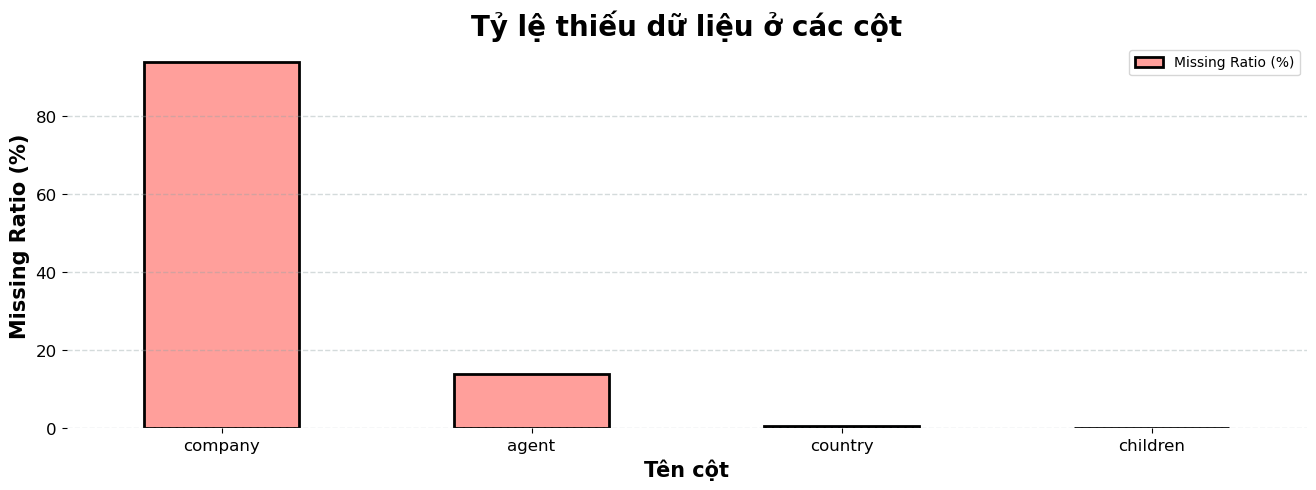

In [155]:
missing_ratio_df = missing_df.copy()
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Tỷ lệ thiếu dữ liệu ở các cột', fontsize=20, fontweight='bold')
plt.xlabel('Tên cột', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

## 5. Fill missing value

In [156]:
hotel_df = hotel_df.fillna(-1)

# II. EDA 1D

In [157]:
numeric_cols = hotel_df.select_dtypes(exclude=['object']).columns
cate_cols = hotel_df.select_dtypes(include=['object']).columns

## 1. Phân phối dữ liệu cột số

### 👉 **Thống kê tóm tắt** 

Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Tối thiểu
- Tứ phân vị dưới
- Trung vị
- Tứ phân vị trên
- Tối đa

Chúng ta sẽ lưu kết quả vào DataFrame `num_col_dist_df`, trong đó:
- Tên các cột là tên các cộthotelrong `anime_df`
- Tên các hàng: `missing_ratio`, `min`, `low_quartile`, `median`, `upper_quartile`, `max`

In [158]:
num_col_dist_df = hotel_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage

num_col_dist_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00,87396.00
mean,0.27,79.89,2016.21,26.84,15.82,1.01,2.63,1.88,0.14,0.01,0.04,0.03,0.18,0.27,80.87,10.08,0.75,106.34,0.08,0.70
std,0.45,86.05,0.69,13.67,8.84,1.03,2.05,0.63,0.46,0.11,0.19,0.37,1.73,0.73,110.05,54.24,10.02,55.01,0.28,0.83
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-6.38,0.00,0.00
25%,0.00,11.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,72.00,0.00,0.00
50%,0.00,49.00,2016.00,27.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,-1.00,0.00,98.10,0.00,0.00
75%,1.00,125.00,2017.00,37.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,-1.00,0.00,134.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**NHẬN XÉT CHUNG**: 
....

### **Biểu đồ Histogram** 

In [162]:
percentages_df = pd.DataFrame()
cols = ['is_canceled', 'is_repeated_guest']
# Duyệt qua các cột trong DataFrame gốc
for column in cols:
    # Tính phần trăm xuất hiện của mỗi giá trị trong cột
    percentages = df[column].value_counts(normalize=True) * 100
    
    # Thêm cột mới vào DataFrame mới với tên là tên cột ban đầu
    percentages_df[column] = percentages

percentages_df

,is_canceled,is_repeated_guest
0,72.44203,96.081359
1,27.55797,3.918641


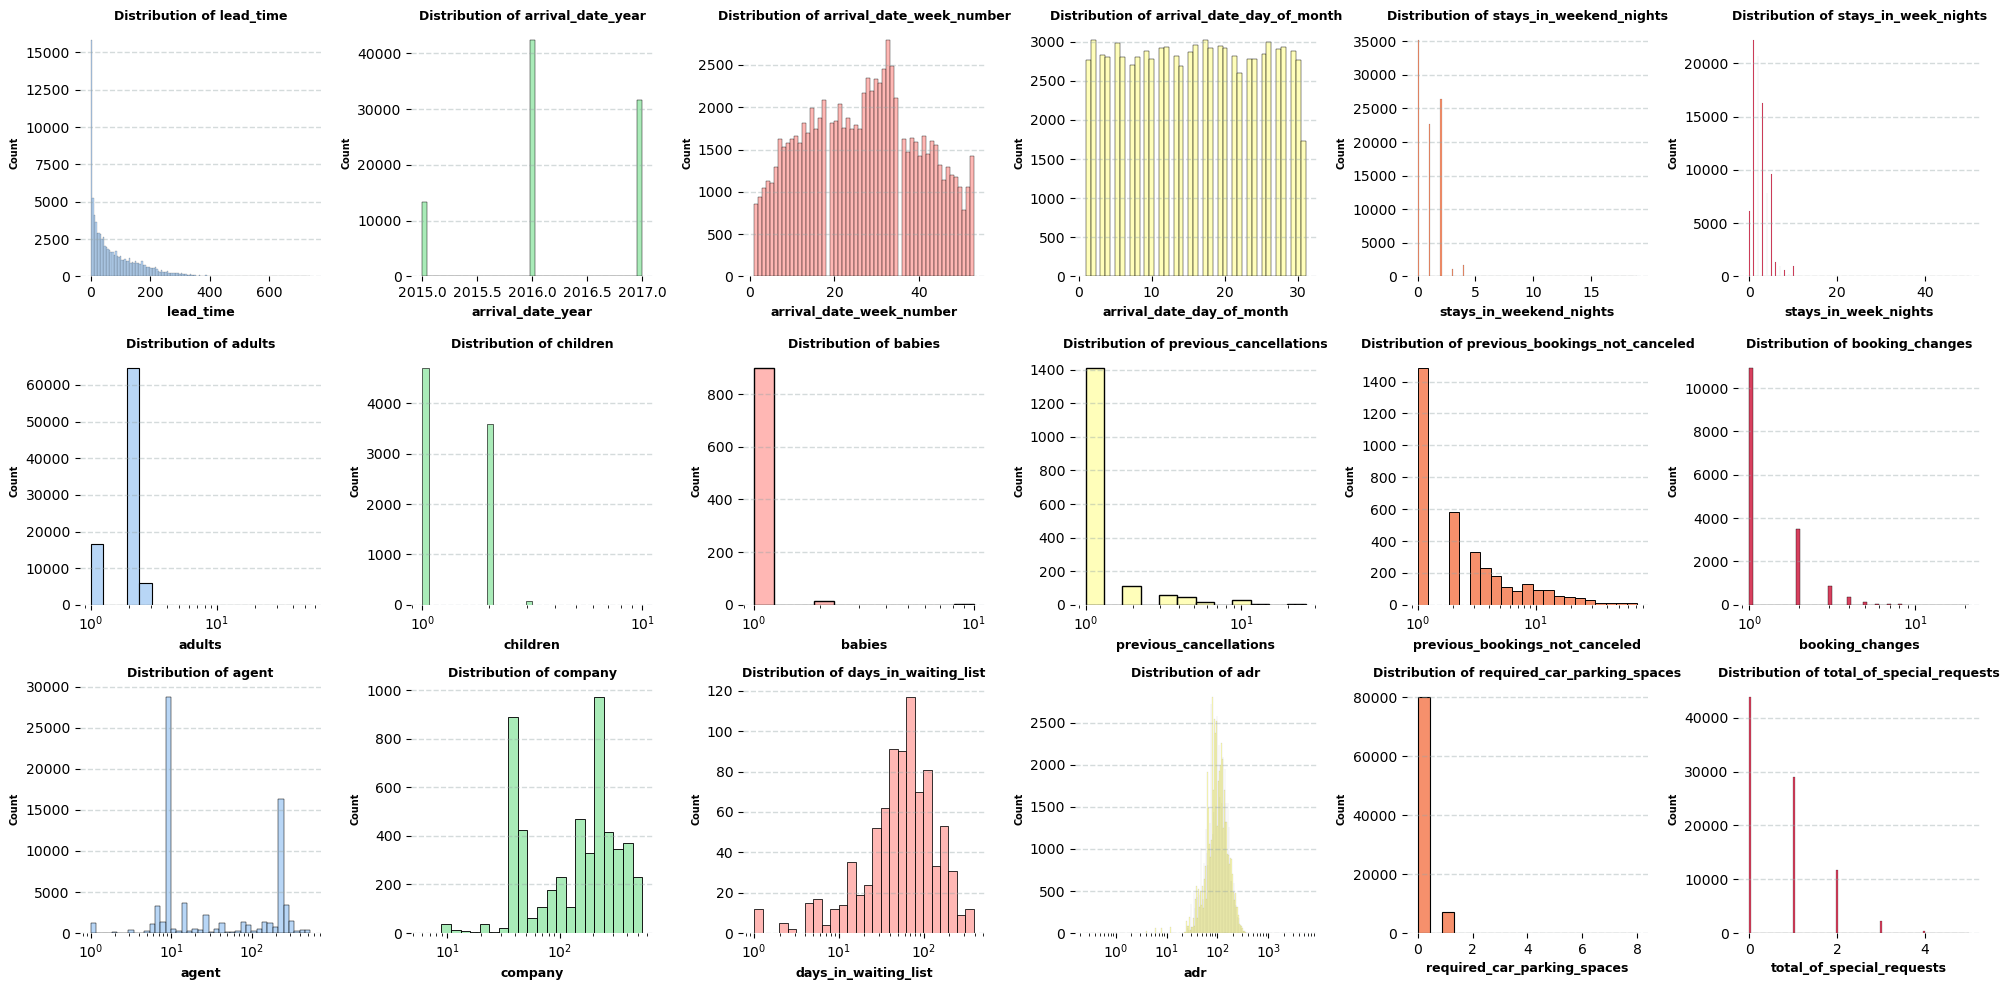

In [163]:
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#fffea3', '#f36b3b','#CC0028']
nrows=3
ncols=6
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))

cols = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            ax_i = ax[r,c]
            if i in [6,7,8,9,10,11,12,13,14,15]:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i, log_scale=True, color=color[np.mod(i,6)])
            else:
                p = sns.histplot(data=hotel_df[cols[i]], ax=ax_i,color=color[np.mod(i,6)])
            p.axes.set_title(f"Distribution of {cols[i]}",fontsize=9, color='k', weight='bold')
            p.axes.set_xlabel(f"{cols[i]}",fontsize=9, weight='bold')
            p.axes.set_ylabel('Count',fontsize=7, weight='bold')
            p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()

## 2. Phân phối dữ liệu không phải kiểu số (Category)

Đối với các cột có kiểu dữ liệu không phải là số, ta sẽ tính:
- Tỷ lệ giá trị bị thiếu [`Missing_ratio`]
- Số lượng giá trị duy nhất trong mỗi cột [`Num_diff_vals`]
- Phân phối từng cột (số lần xuất hiện của từng giá trị duy nhất) [`Distribution`]

In [164]:
str_col_name = cate_cols.copy()
str_col_dist_df = pd.DataFrame(columns=str_col_name,
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = hotel_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = hotel_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (hotel_df[str_col_name] == '').sum() / hotel_df.shape[0] * 100
str_col_dist_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
Missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Num_diff_vals,2,12,5,178,8,5,10,12,3,4,3,926
Distribution,"{'City Hotel': 53428, 'Resort Hotel': 33968}","{'August': 11257, 'July': 10057, 'May': 8355, ...","{'BB': 67978, 'SC': 9481, 'HB': 9085, 'Undefin...","{'PRT': 27453, 'GBR': 10433, 'FRA': 8837, 'ESP...","{'Online TA': 51618, 'Offline TA/TO': 13889, '...","{'TA/TO': 69141, 'Direct': 12988, 'Corporate':...","{'A': 56552, 'D': 17398, 'E': 6049, 'F': 2823,...","{'A': 46313, 'D': 22432, 'E': 7195, 'F': 3627,...","{'No Deposit': 86251, 'Non Refund': 1038, 'Ref...","{'Transient': 71986, 'Transient-Party': 11727,...","{'Check-Out': 63371, 'Canceled': 23011, 'No-Sh...","{'2/14/2016': 211, '5/25/2017': 205, '10/21/20..."


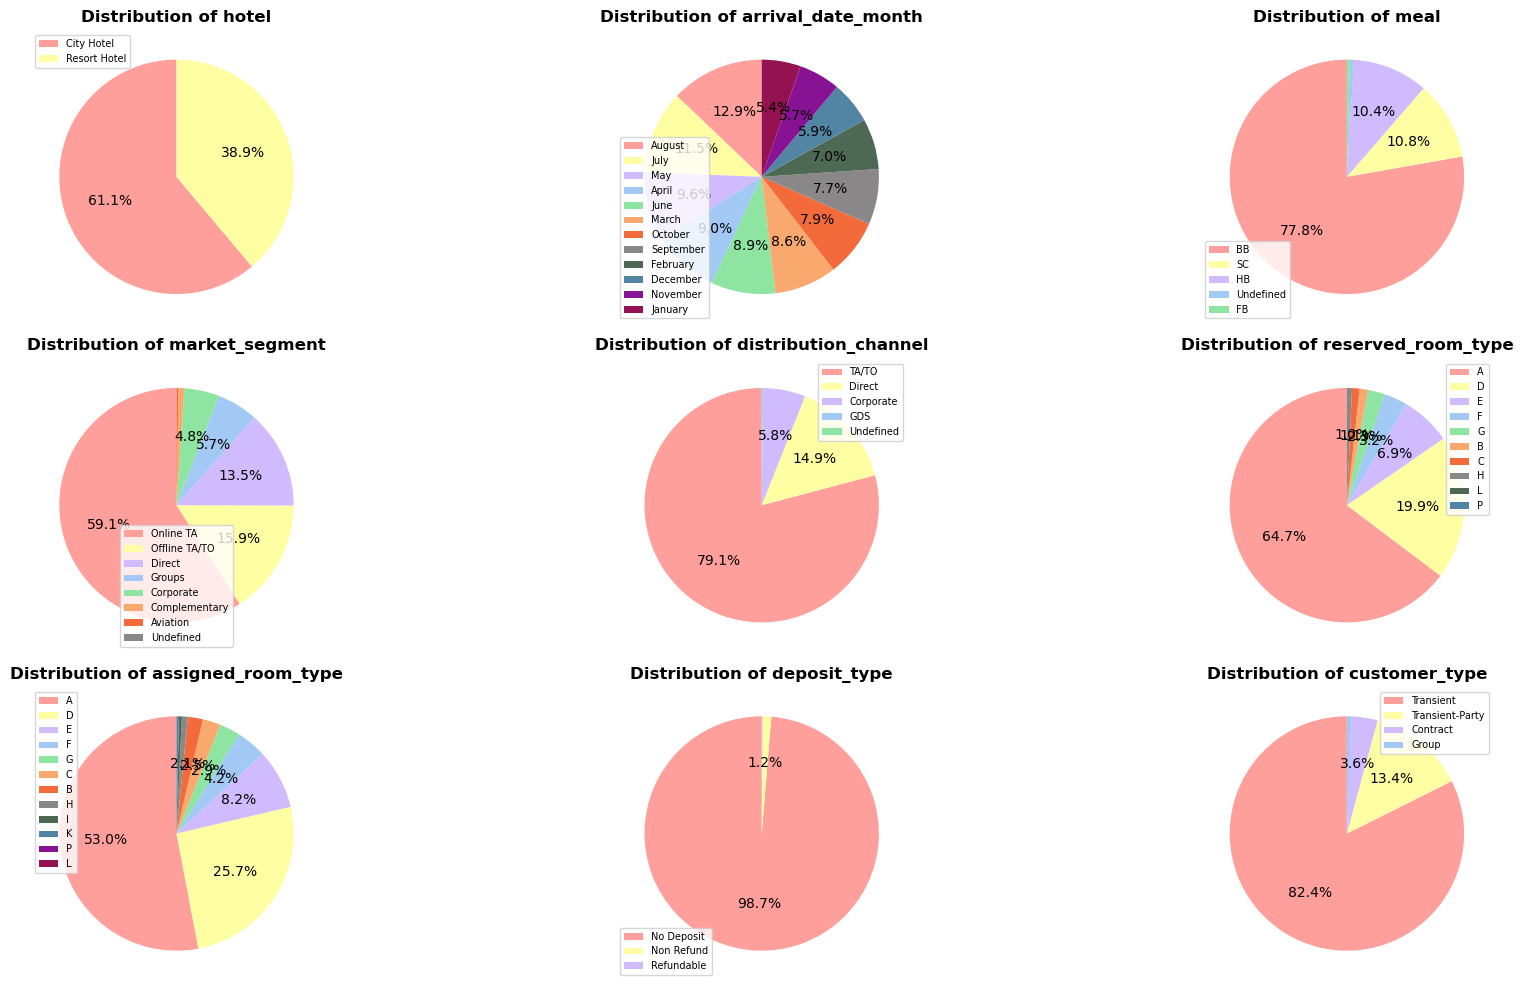

In [201]:
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1',"#faa96e","#f36b3b", '#8a8788', '#4d6953', '#5284a3', '#871294', '#941251']
nrows=3
ncols=3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
cols = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']
type_counts = hotel_df[cols].value_counts()
for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(cols):
            type_counts = hotel_df[cols[i]].value_counts()
            ax_i = ax[r,c]
            ax_i.pie(type_counts,autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '',startangle=90,colors=colors) 
            ax_i.set_title(f'Distribution of {cols[i]}', fontsize=12, weight='bold')
            if i == 1:
                ax_i.legend(type_counts.index,fontsize=7,loc='lower left')
            else:
                ax_i.legend(type_counts.index,fontsize=7,loc='best')

sns.despine(left=True, bottom=True)
plt.tight_layout()

# EDA 2D

## 1. Phân tích hệ số tương quan giữa các cột số

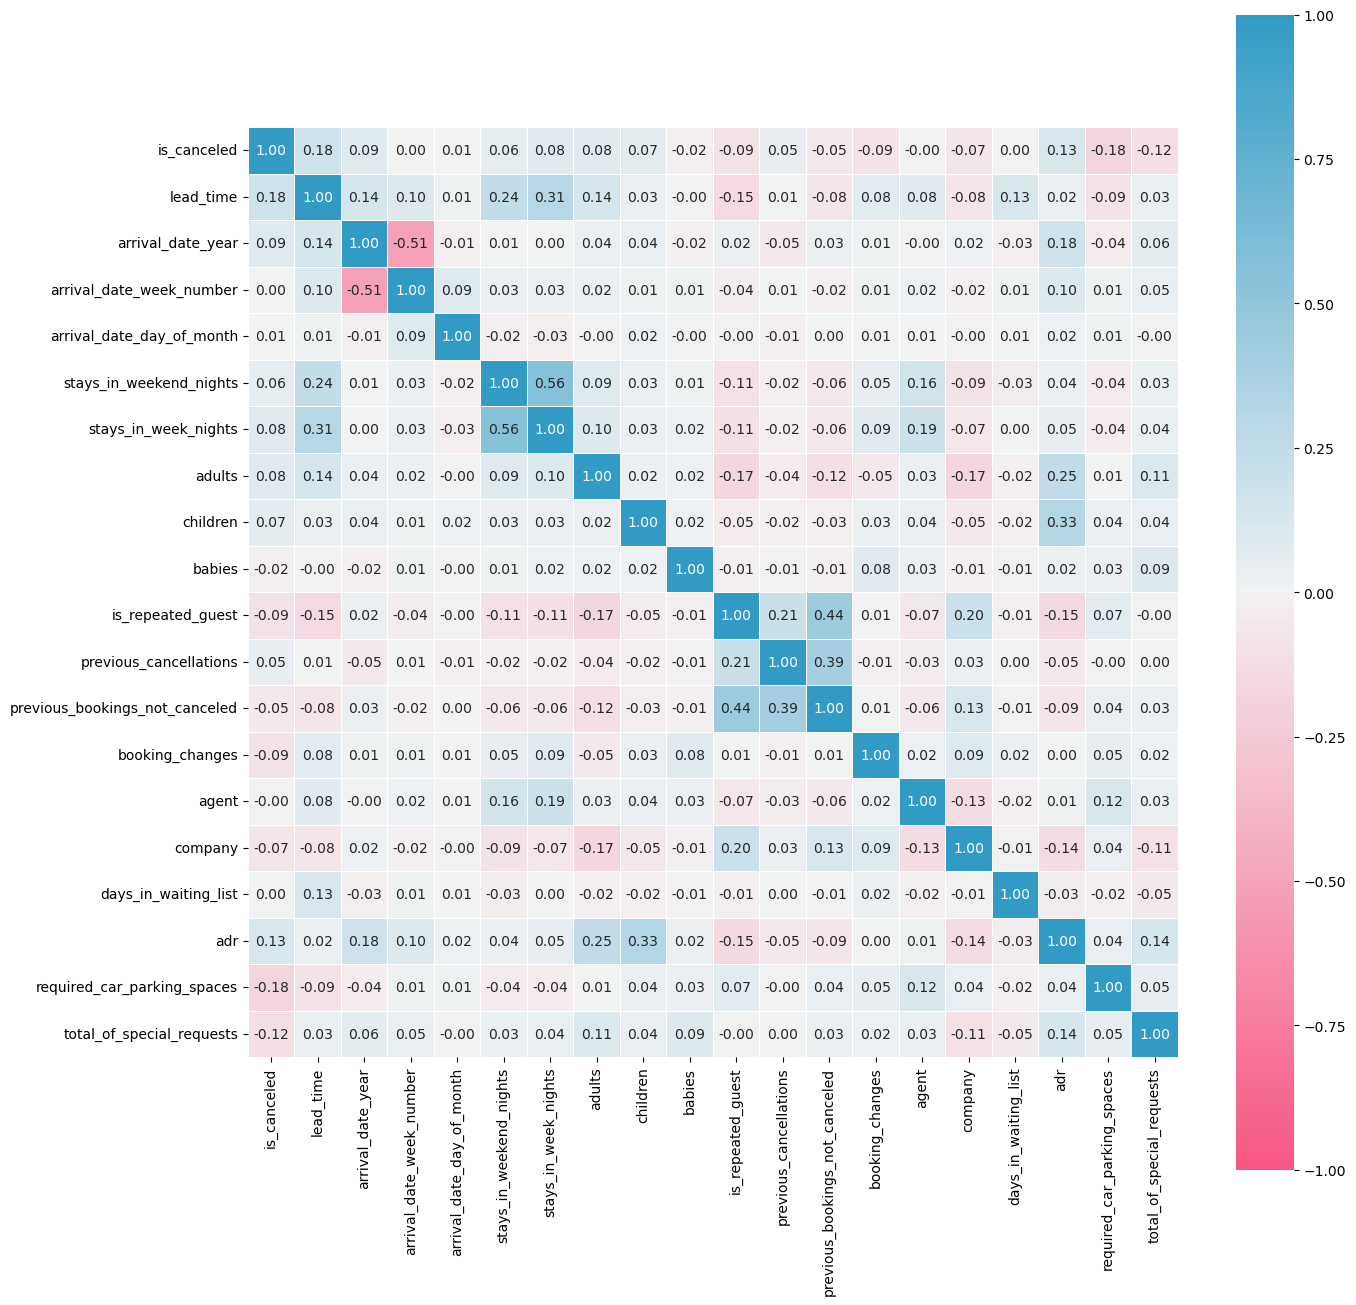

In [203]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
ax = sns.heatmap(hotel_df[numeric_cols].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap=cmap, vmin=-1, vmax=1)

In [209]:
hotel_df['arrival_date_year'].value_counts()
hotel_df['required_car_parking_spaces'].value_counts()

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [207]:
cate_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [206]:
numeric_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
['lead_time', 'arrival_date_day_of_month'] 